# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

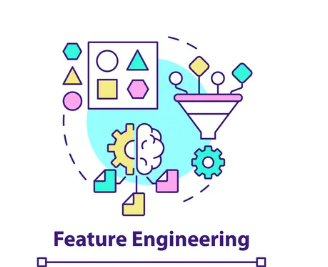

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [5]:
import pandas as pd
df = pd.read_csv('loan_train.csv')
df


Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
new_df = df.drop("Loan_ID", axis='columns', inplace=True)
new_df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [8]:
new_df = df.select_dtypes(include=['object','bool'])
new_df.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [9]:
new_df.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'most_frequent') # most_frequent means mode
data = impute.fit_transform(new_df)
data

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [11]:
result_df = pd.DataFrame(data,columns=new_df.columns)
result_df.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
nominal_df =  ohe.fit_transform(result_df[["Gender",'Self_Employed','Married']]).toarray() # for onehotencoder it does not
nominal_df

array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0.]])

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [28]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
result_df[['Education','Property_Area']] = oe.fit_transform(result_df[['Education','Property_Area']])
result_df

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result_df['Loan_Status'] = le.fit_transform(result_df[['Loan_Status']])
result_df.head()

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gender Married Dependents  Education Self_Employed  Property_Area  \
0   Male      No          0        0.0            No            2.0   
1   Male     Yes          1        0.0            No            0.0   
2   Male     Yes          0        0.0           Yes            2.0   
3   Male     Yes          0        1.0            No            2.0   
4   Male      No          0        0.0            No            2.0   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result_df['Loan_Status'] = le.fit_transform(result_df.Loan_Status)
result_df.head()

Gender Married Dependents  Education Self_Employed  Property_Area  \
0   Male      No          0        0.0            No            2.0   
1   Male     Yes          1        0.0            No            0.0   
2   Male     Yes          0        0.0           Yes            2.0   
3   Male     Yes          0        1.0            No            2.0   
4   Male      No          0        0.0            No            2.0   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

#### Ordinal encoder's fit_transform() method expect 2D array as parameters, where as Label encoder's fit_transform() method expect 1D array as parameter.